#### Libraries and Setup

In [1]:
%pip install scikit-learn matplotlib;

Note: you may need to restart the kernel to use updated packages.


# Week 3 Assignment

## Introduction
In this notebook, we explore Lasso Regression and Ridge Regression models using a 3-D synthetic dataset. We will visualize the prediction planes for both models and try to observe their performance w.r.t their penalty in the cost function. We will also use 5-fold cross-validation to plot the mean and standard deviation of prediction error w.r.t weight parameter (C) for both models.

## Table of Contents
1. [Data Loading and 3-D Visualization of Features and Target](#Data-Loading-and-3-D-Visualization-of-Features-and-Target)
    - [Visualization from a different angle](#Visualization-from-a-different-angle)
2. [Adding Extra Polynomial Features and Training Lasso Regression Model](#Adding-Extra-Polynomial-Features-and-Training-Lasso-Regression-Model)
    - [Lasso Model's Score and Comparision with Baseline Predictor](#Lasso-Model's-Score-and-Comparision-with-Baseline-Predictor)
3. [3-D Visualization of Prediction Planes with Lasso Model](#3-D-Visualization-of-Prediction-Planes-with-Lasso-Model)
4. [Training Ridge Regression Model with Extra Polynomial Features](#Training-Ridge-Regression-Model-with-Extra-Polynomial-Features)
    - [Ridge Model's Score and Comparision with Baseline Predictor](#Ridge-Model's-Score-and-Comparision-with-Baseline-Predictor)
5. [3-D Visualization of Prediction Planes with Ridge Model](#3-D-Visualization-of-Prediction-Planes-with-Ridge-Model)
6. [Mean and Standard Deviation of Prediction Error vs C (Lasso Regression)](#Mean-and-Standard-Deviation-of-Prediction-Error-vs-C-(Lasso-Regression))
7. [Mean and Standard Deviation of Prediction Error vs C (Ridge Regression)](#Mean-and-Standard-Deviation-of-Prediction-Error-vs-C-(Ridge-Regression))


## Data Loading and 3-D Visualization of Features and Target

    x_1   x_2    target
0 -0.94 -0.05 -1.044502
1 -0.23 -0.48 -0.357514
2 -0.44 -0.81 -0.948793
3  0.89 -0.17 -1.255928
4  0.36 -0.43 -0.633547


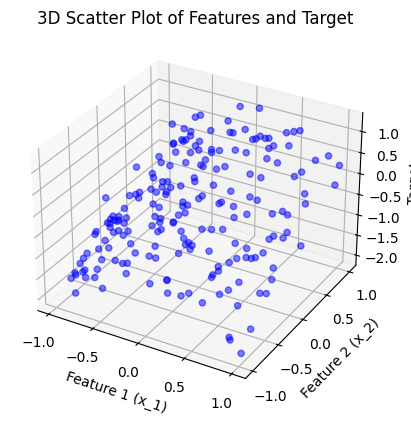

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('week3.csv', header=None, names=['x_1', 'x_2', 'target'])
print(data.head())

# Extract features and target
X = data.iloc[:, :2].values  # x_1 and x_2
y = data.iloc[:, 2].values   # target

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x_1 on x, x_2 on y, and target on z
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.5)

# Label the plot
ax.set_xlabel('Feature 1 (x_1)')
ax.set_ylabel('Feature 2 (x_2)')
ax.set_zlabel('Target')
ax.set_title('3D Scatter Plot of Features and Target')

# Show the plot
plt.show()

### Visualization from a different angle

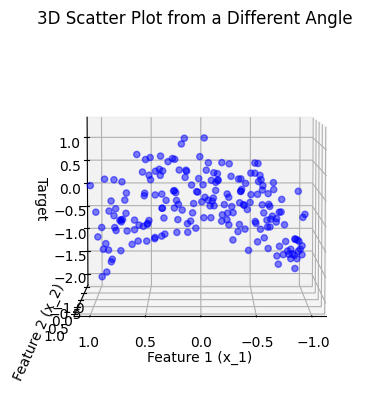

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.5)
ax.set_xlabel('Feature 1 (x_1)')
ax.set_ylabel('Feature 2 (x_2)')
ax.set_zlabel('Target', labelpad=10)
ax.set_title('3D Scatter Plot from a Different Angle')

# Adjust the viewing angle
ax.view_init(elev=5, azim=90)

plt.show()


## Adding Extra Polynomial Features and Training Lasso Regression Model

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=5)

# Transform both the training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

C_values = [0.1, 1, 5, 10, 100, 500, 1000]

# Covert C to alpha, where alpha = 1/(2C)
alphas = [1 / (2 * C) for C in C_values]

# Dictionary to store model parameters for each C
lasso_params = {}

# Train Lasso models for different values of C
for i in range(len(C_values)):
    C = C_values[i]
    alpha = alphas[i]
    
    # Train the Lasso model
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_poly, y_train)
    
    # Store the parameters of the model for the given C value
    lasso_params[C] = lasso.coef_

# Get the polynomial feature names
feature_names = poly.get_feature_names_out(['x_1', 'x_2'])

# Report parameters for each value of C
for C in C_values:
    print(f"\n\033[1mLasso regression parameters for C = {C}:\033[0m")
    
    for i in range(len(feature_names)):
        feature = feature_names[i]
        coef = lasso_params[C][i]
        print(f"{feature}: {coef}")



Lasso regression parameters for C = 0.1:
1: 0.0
x_1: 0.0
x_2: 0.0
x_1^2: -0.0
x_1 x_2: 0.0
x_2^2: -0.0
x_1^3: 0.0
x_1^2 x_2: 0.0
x_1 x_2^2: 0.0
x_2^3: 0.0
x_1^4: -0.0
x_1^3 x_2: 0.0
x_1^2 x_2^2: -0.0
x_1 x_2^3: 0.0
x_2^4: -0.0
x_1^5: 0.0
x_1^4 x_2: 0.0
x_1^3 x_2^2: -0.0
x_1^2 x_2^3: 0.0
x_1 x_2^4: 0.0
x_2^5: 0.0

Lasso regression parameters for C = 1:
1: 0.0
x_1: 0.0
x_2: 0.0
x_1^2: -0.0
x_1 x_2: 0.0
x_2^2: -0.0
x_1^3: 0.0
x_1^2 x_2: 0.0
x_1 x_2^2: 0.0
x_2^3: 0.0
x_1^4: -0.0
x_1^3 x_2: 0.0
x_1^2 x_2^2: -0.0
x_1 x_2^3: 0.0
x_2^4: -0.0
x_1^5: 0.0
x_1^4 x_2: 0.0
x_1^3 x_2^2: -0.0
x_1^2 x_2^3: 0.0
x_1 x_2^4: 0.0
x_2^5: 0.0

Lasso regression parameters for C = 5:
1: 0.0
x_1: 0.0
x_2: 0.6991394881416718
x_1^2: -0.0
x_1 x_2: 0.0
x_2^2: -0.0
x_1^3: 0.0
x_1^2 x_2: 0.0
x_1 x_2^2: -0.0
x_2^3: 0.0
x_1^4: -0.0
x_1^3 x_2: -0.0
x_1^2 x_2^2: -0.0
x_1 x_2^3: 0.0
x_2^4: -0.0
x_1^5: 0.0
x_1^4 x_2: 0.0
x_1^3 x_2^2: -0.0
x_1^2 x_2^3: 0.0
x_1 x_2^4: -0.0
x_2^5: 0.0

Lasso regression parameters for C = 10:


### Lasso Model's Score and Comparision with Baseline Predictor

In [6]:
from sklearn.metrics import r2_score

# Calculate the baseline prediction (mean of the training set target values)
y_train_mean = np.mean(y_train)

# Use this mean to predict the test set
y_test_baseline_pred = np.full_like(y_test, fill_value=y_train_mean)

# Calculate the R^2 score for the baseline predictor
baseline_r2 = r2_score(y_test, y_test_baseline_pred)
print(f"Baseline Predictor R^2 Score: {baseline_r2 * 100:.4f}")

# Evaluate the model performance on the test set and compare it with baseline predictor
for i in range(len(C_values)):
    C = C_values[i]
    alpha = alphas[i]

    lasso = Lasso(alpha, max_iter=10000)
    lasso.fit(X_train_poly, y_train)
    test_score = lasso.score(X_test_poly, y_test)
    print(f"\nTest R^2 score for C = {C}: {test_score * 100:.4f}")

Baseline Predictor R^2 Score: -4.2716

Test R^2 score for C = 0.1: -4.2716

Test R^2 score for C = 1: -4.2716

Test R^2 score for C = 5: 60.5976

Test R^2 score for C = 10: 80.4144

Test R^2 score for C = 100: 88.7379

Test R^2 score for C = 500: 88.0590

Test R^2 score for C = 1000: 87.2579


## 3-D Visualization of Prediction Planes with Lasso Model

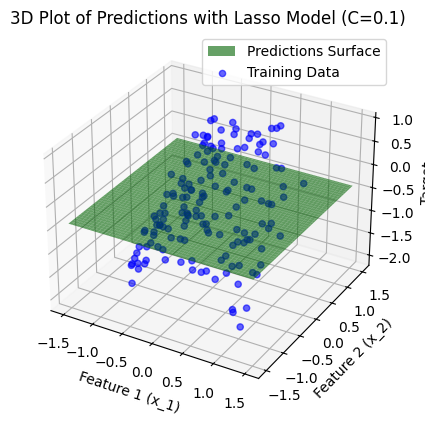

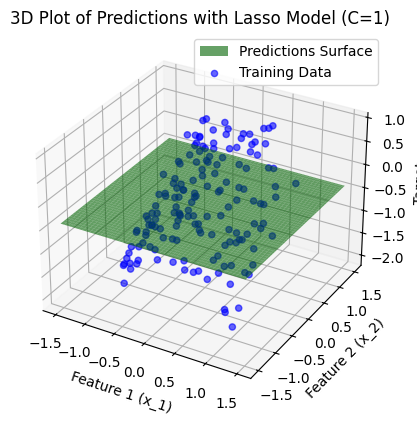

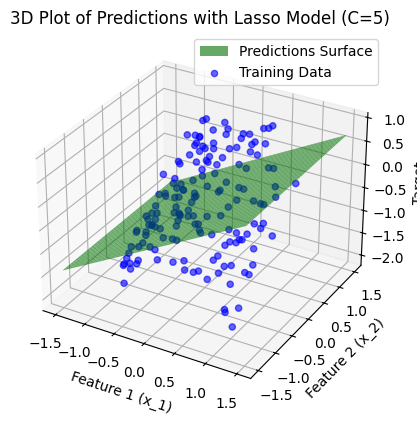

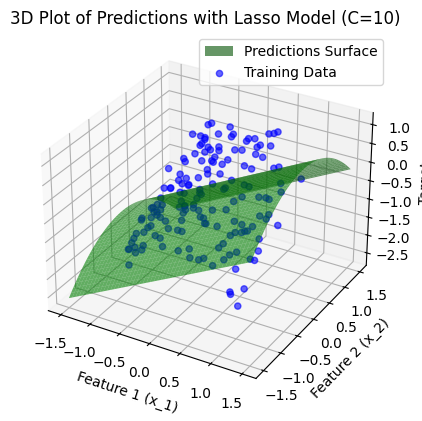

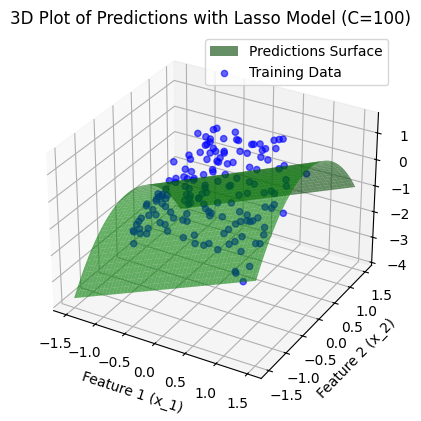

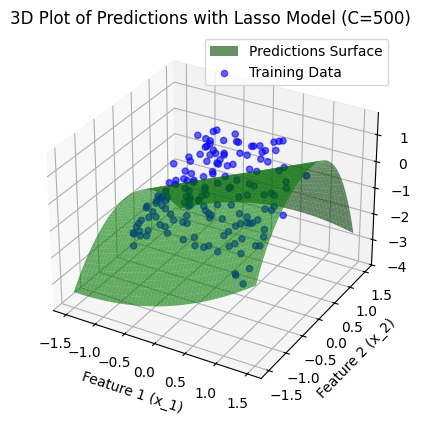

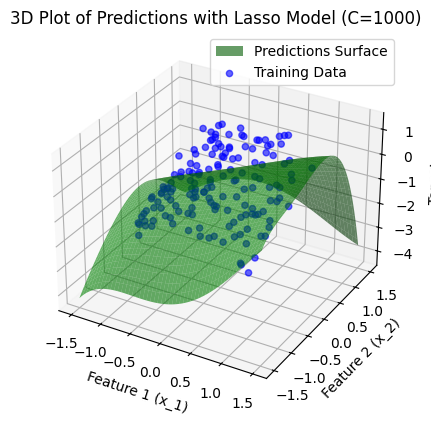

In [7]:
    grid = np.linspace(-1.5, 1.5, 100)
    X_grid = []
    
    # Create grid points for (x_1, x_2) combinations
    for i in grid:
        for j in grid:
            X_grid.append([i, j])
    X_grid = np.array(X_grid)
    
    # Transform the grid points to include polynomial features (same as we did with training data)
    X_grid_poly = poly.transform(X_grid)
    
    for i in range(len(C_values)):
        C = C_values[i]
        alpha = alphas[i]
        
        lasso = Lasso(alpha, max_iter=10000)
        lasso.fit(X_train_poly, y_train)
    
        # Generate predictions for the grid points
        y_pred = lasso.predict(X_grid_poly)
    
        # Reshape the predictions and grid for plotting a surface
        X1, X2 = np.meshgrid(grid, grid)
        Y_pred = y_pred.reshape(X1.shape)
    
        # Create a new figure for each C
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
        # Plot the surface of predictions for the current value of C
        ax.plot_surface(X1, X2, Y_pred, color='green', alpha=0.6)
        
        # Plot the original training data as scatter points
        ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.6, label='Training Data', s=20)
    
        ax.set_xlabel('Feature 1 (x_1)')
        ax.set_ylabel('Feature 2 (x_2)')
        ax.set_zlabel('Target')
        ax.set_title(f'3D Plot of Predictions with Lasso Model (C={C})')
        # ax.view_init(elev=5, azim=90)
    
        ax.legend(['Predictions Surface', 'Training Data'])
        plt.show()


## Training Ridge Regression Model with Extra Polynomial Features

In [8]:
from sklearn.linear_model import Ridge

C_values = [0.0001, 0.001, 0.1, 1, 5, 10, 100, 1000]
alphas = [1/(2*C) for C in C_values]

ridge_params = {}
feature_names = poly.get_feature_names_out()

for i in range(len(C_values)):
    C = C_values[i]
    alpha = alphas[i]

    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train_poly, y_train)
    
    ridge_params[C] = ridge.coef_
    
for C in C_values:
    print(f"\n\n\033[1mRidge regression parameters for C = {C}:\033[0m")
    
    for i in range(len(feature_names)):
        feature = feature_names[i]
        coef = ridge_params[C][i]
        print(f"{feature}: {coef}")
        



Ridge regression parameters for C = 0.0001:
1: 0.0
x0: 0.0006071963573710493
x1: 0.009938025905786097
x0^2: -0.0035708190574802144
x0 x1: 1.4117265155990698e-05
x1^2: -0.00036802593844803306
x0^3: 0.00035880268802143195
x0^2 x1: 0.003667259125777794
x0 x1^2: 0.00012933048639697663
x1^3: 0.005984844069881878
x0^4: -0.003171562452874594
x0^3 x1: 5.8524360431553667e-05
x0^2 x1^2: -0.001335656854143981
x0 x1^3: 0.00015640361242216092
x1^4: -0.0005275773218988116
x0^5: 0.0001897173636370443
x0^4 x1: 0.0022435963268486268
x0^3 x1^2: -0.0001325117641116451
x0^2 x1^3: 0.0023190147422878
x0 x1^4: 4.819727852621326e-05
x1^5: 0.004373489483640605


Ridge regression parameters for C = 0.001:
1: 0.0
x0: 0.0047485588459856955
x1: 0.08562052359479763
x0^2: -0.033090347410233034
x0 x1: 2.6707104955766202e-05
x1^2: -0.0026472176239265297
x0^3: 0.0029221298843300223
x0^2 x1: 0.03122664233381873
x0 x1^2: 0.0008075897299212986
x1^3: 0.05071568524002553
x0^4: -0.02928406654793149
x0^3 x1: 0.0003074288648

### Ridge Model's Score and Comparision with Baseline Predictor

In [9]:
print(f"Baseline Predictor R^2 Score: {baseline_r2 * 100:.4f}")

for i in range(len(C_values)):
    C = C_values[i]
    alpha = alphas[i]

    ridge = Ridge(alpha, max_iter=10000)
    ridge.fit(X_train_poly, y_train)
    test_score = ridge.score(X_test_poly, y_test)
    print(f"\nTest R^2 score for C = {C}: {test_score * 100:.4f}")

Baseline Predictor R^2 Score: -4.2716

Test R^2 score for C = 0.0001: -1.5458

Test R^2 score for C = 0.001: 17.6299

Test R^2 score for C = 0.1: 86.6641

Test R^2 score for C = 1: 86.8390

Test R^2 score for C = 5: 86.0792

Test R^2 score for C = 10: 85.8389

Test R^2 score for C = 100: 85.5179

Test R^2 score for C = 1000: 85.4767


## 3-D Visualization of Prediction Planes with Ridge Model

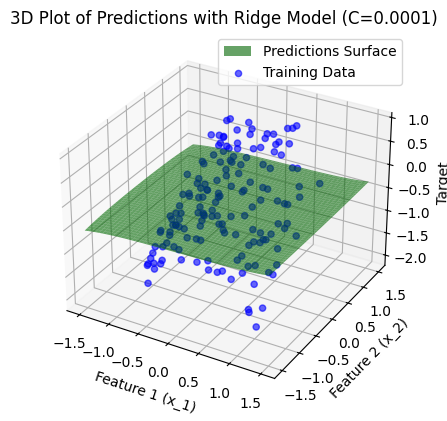

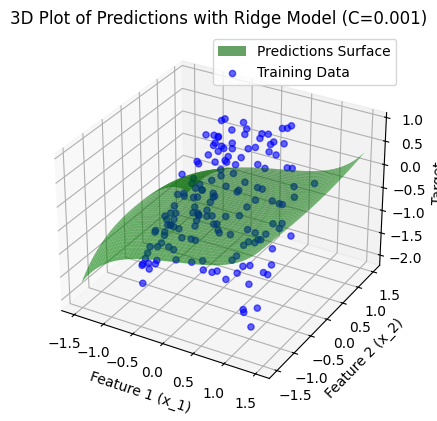

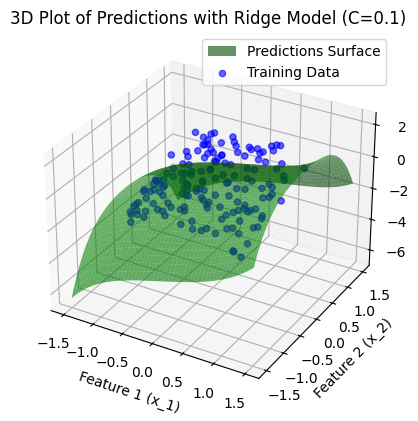

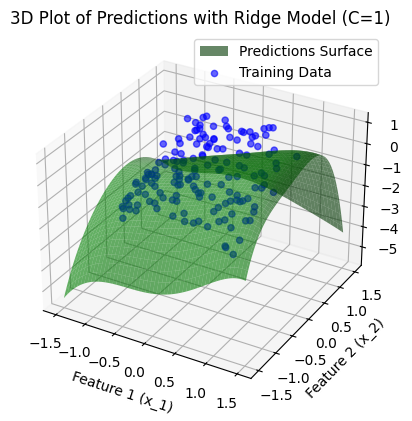

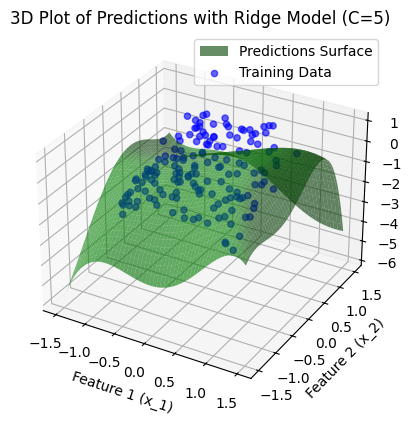

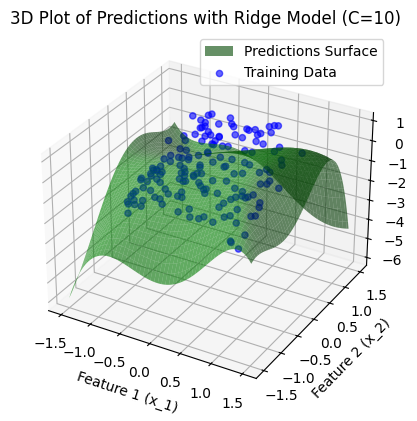

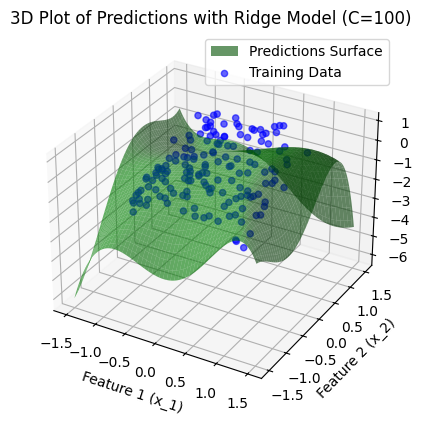

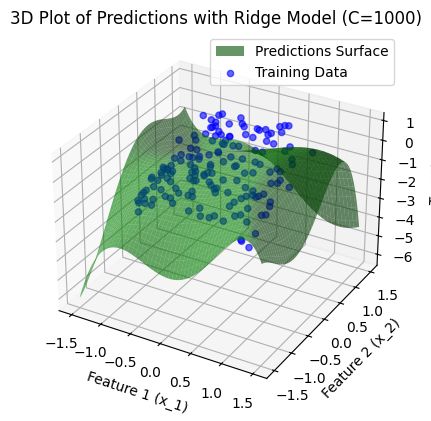

In [10]:
grid = np.linspace(-1.5, 1.5, 100)
X_grid = []

for i in grid:
    for j in grid:
        X_grid.append([i, j])
X_grid = np.array(X_grid)

X_grid_poly = poly.transform(X_grid)

for i in range(len(C_values)):
    C = C_values[i]
    alpha = alphas[i]
    
    ridge = Ridge(alpha, max_iter=10000)
    ridge.fit(X_train_poly, y_train)

    y_pred = ridge.predict(X_grid_poly)

    X1, X2 = np.meshgrid(grid, grid)
    Y_pred = y_pred.reshape(X1.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X1, X2, Y_pred, color='green', alpha=0.6)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.6, label='Training Data', s=20)

    ax.set_xlabel('Feature 1 (x_1)')
    ax.set_ylabel('Feature 2 (x_2)')
    ax.set_zlabel('Target')
    ax.set_title(f'3D Plot of Predictions with Ridge Model (C={C})')
    # ax.view_init(elev=5, azim=90)

    ax.legend(['Predictions Surface', 'Training Data'])
    plt.show()


## Mean and Standard Deviation of Prediction Error vs C (Lasso Regression)

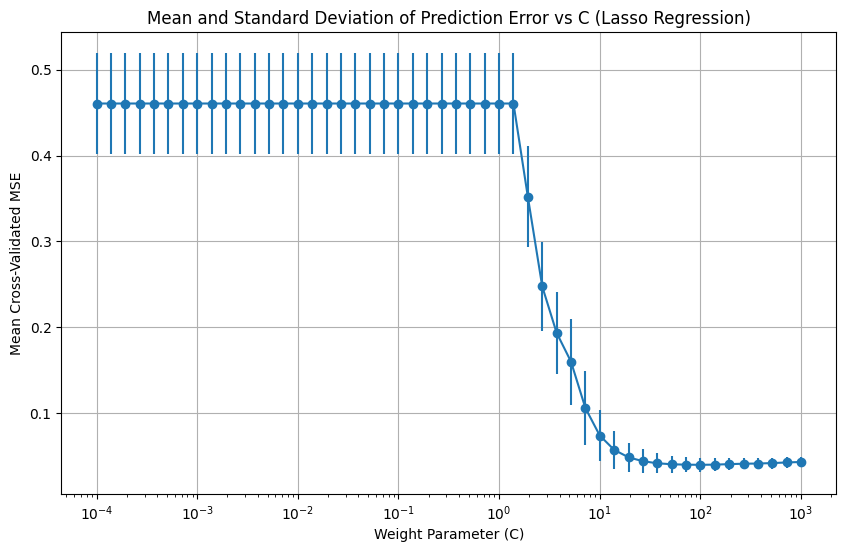

In [11]:
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=5)

# Define the range of C values
C_values = np.logspace(-4, 3, 50)  # 50 values from 0.0001 to 1000

# Store mean and standard deviation of the cross-validated MSE
mean_errors = []
std_errors = []

# 5-fold cross-validation for each C
for C in C_values:
    lasso = Lasso(alpha=1/(2*C), max_iter=10000)
    # Use cross_val_score to compute MSE
    scores = cross_val_score(lasso, poly.fit_transform(X_train), y_train, cv=5, scoring='neg_mean_squared_error')
    mean_errors.append(-scores.mean())  # Store the mean of negative MSE (since it returns negative)
    std_errors.append(scores.std())  # Store the std deviation

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(C_values, mean_errors, yerr=std_errors, fmt='o-')
plt.xscale('log')
plt.xlabel('Weight Parameter (C)')
plt.ylabel('Mean Cross-Validated MSE')
plt.title('Mean and Standard Deviation of Prediction Error vs C (Lasso Regression)')
plt.grid(True)
plt.show()

## Mean and Standard Deviation of Prediction Error vs C (Ridge Regression)

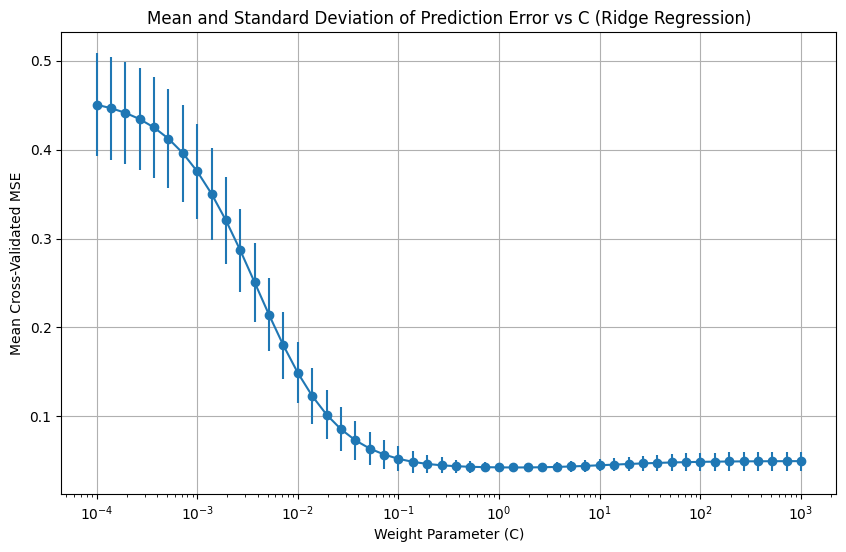

In [12]:
poly = PolynomialFeatures(degree=5)

C_values = np.logspace(-4, 3, 50)  # 50 values from 0.0001 to 1000

mean_errors = []
std_errors = []

for C in C_values:
    ridge = Ridge(alpha=1/(2*C), max_iter=10000)
    
    scores = cross_val_score(ridge, poly.fit_transform(X_train), y_train, cv=5, scoring='neg_mean_squared_error')
    mean_errors.append(-scores.mean())
    std_errors.append(scores.std())

plt.figure(figsize=(10,6))
plt.errorbar(C_values, mean_errors, yerr=std_errors, fmt='o-')
plt.xscale('log')
plt.xlabel('Weight Parameter (C)')
plt.ylabel('Mean Cross-Validated MSE')
plt.title('Mean and Standard Deviation of Prediction Error vs C (Ridge Regression)')
plt.grid(True)
plt.show()